## Serial LETK Filtering


In [37]:
import Simulator
import Observation
import Statistics
import SLETKalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [38]:
timestamp = "2021_08_26-12_22_18"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [39]:
statistics = Statistics.Statistics(simulator, N_e=100, safe_history=True)

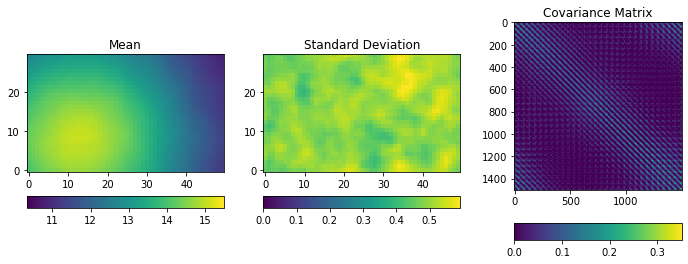

In [40]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [41]:
obs_timestamp = "2021_08_26-12_22_28"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


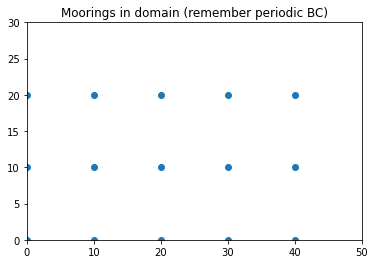

In [42]:
observation.plot_positions()

## LETKF filtering

Updating/conditioning the distributions at every observation time

In [43]:
# We choose the scale_r as about 2/3 of the correlation length in grid cells 
scale_r = 8

In [44]:
sletkFilter = SLETKalmanFilter.SLETKalman(statistics, observation, scale_r)

In [45]:
sletkFilter.groups

[[0, 2, 6, 8, 14], [1, 4, 5, 7, 13], [11, 3, 9], [10, 12]]

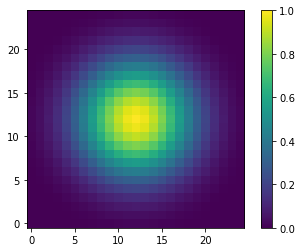

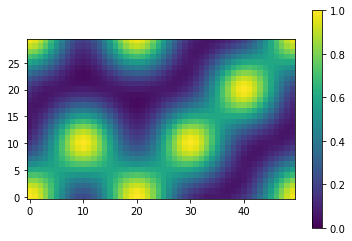

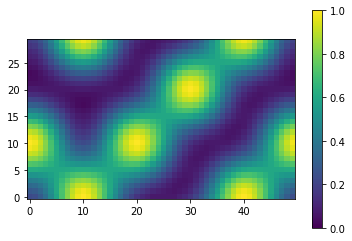

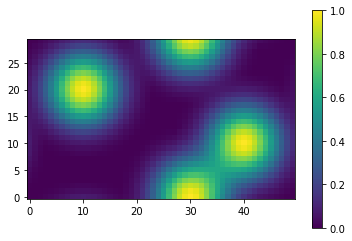

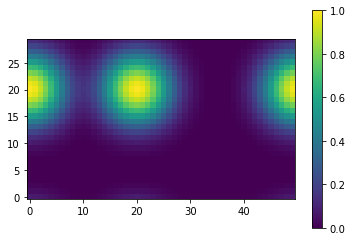

In [46]:
from matplotlib import pyplot as plt
plt.imshow(sletkFilter.W_loc, origin="lower", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()
for g in range(len(sletkFilter.groups)):
    plt.imshow(sletkFilter.W_analyses[g], origin="lower", vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

0


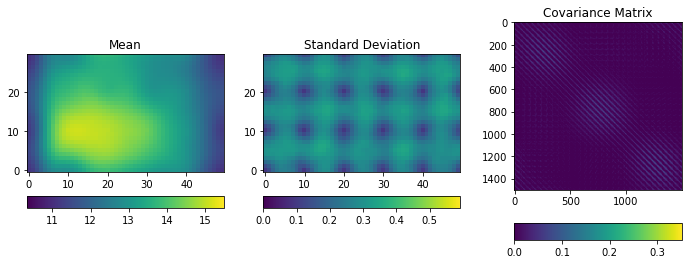

1


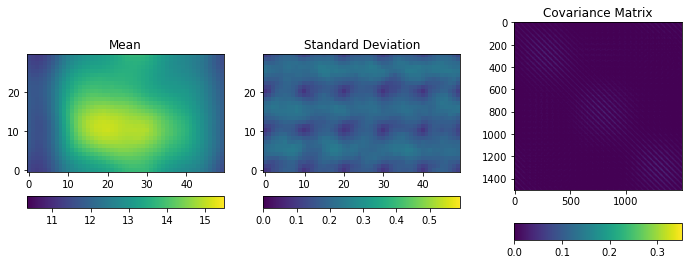

2


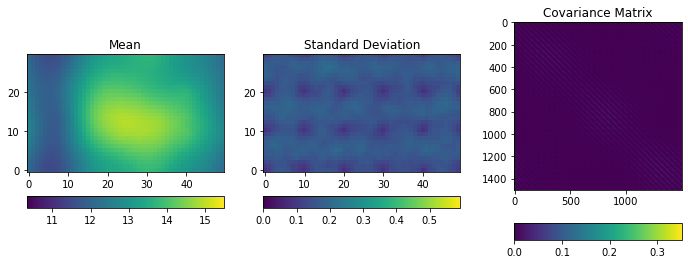

3


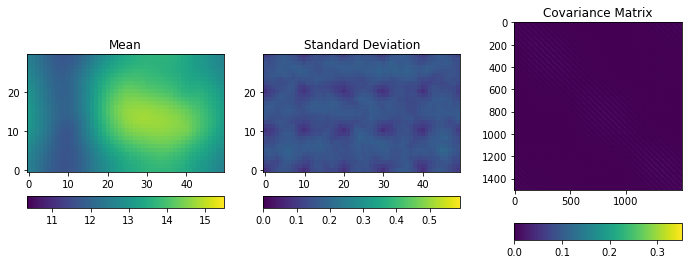

4


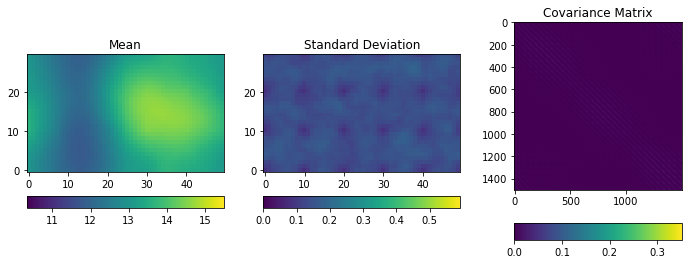

5


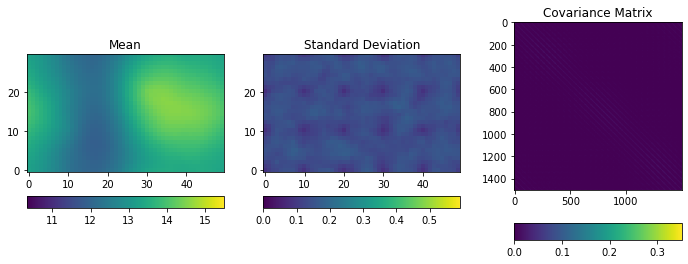

6


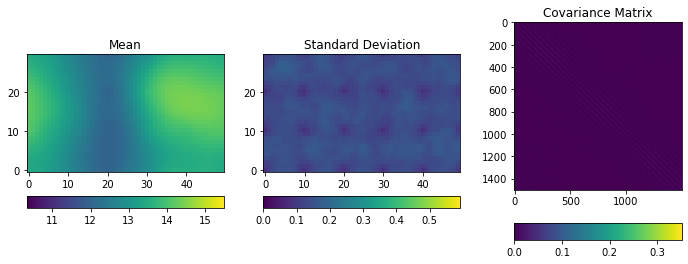

7


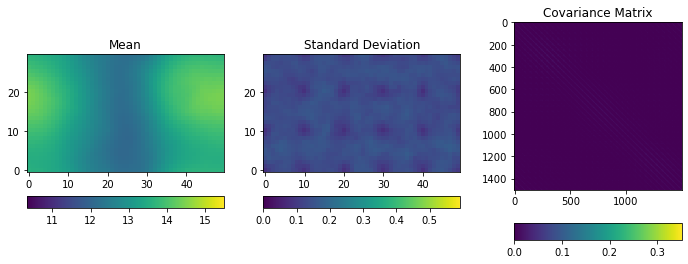

8


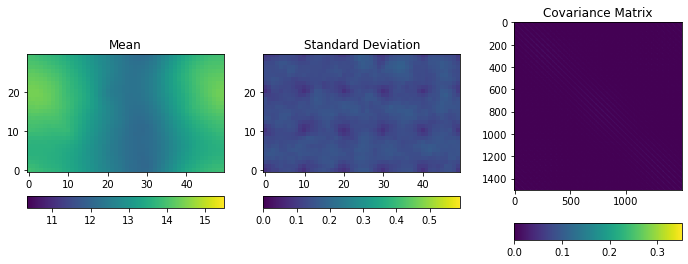

9


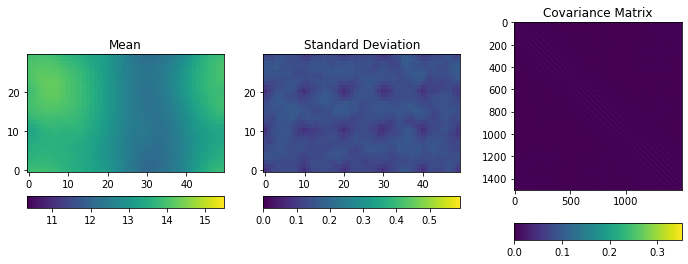

In [47]:
for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    sletkFilter.filter(statistics.ensemble.ensemble, observation.obses[t])
    statistics.plot()

## Correlation Study

In [48]:
points = [[20,10],[29,13]]

statistics.evaluate_correlation(points)


0.2501628653213607